# Dowdle's Banknote Authentication Prediction
**Author:** Brittany Dowdle  
**Date:** March 31, 2025  
**Objective:** This project will demonstrate my ability to apply classification modeling techniques to a real-world dataset. I will:  
- Load and explore a dataset.
- Analyze feature distributions and consider feature selection.
- Train and evaluate a classification model.
- Compare different classification approaches.
- Document your work in a structured Jupyter Notebook.
- Conduct a peer review of a classmate’s project. 

## Introduction
This project uses the UCI Banknote Authentication Dataset to detect authenticity based on features such as Variance, Skewness, and Curtosis. The goal is to predict which notes are genuine/fake. I will create a Random Forest model, split/train the data, evaluate performance using key metrics, and create visualizations to interpret the results.

****

## Imports
In the code cell below are the necessary Python libraries for this notebook. *All imports should be at the top of the notebook.*

In [23]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
from pandas.plotting import scatter_matrix

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import for splitting data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

# Import classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Import performance metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import RobustScaler

****

## Section 1. Import and Inspect the Data
### 1.1 Load the dataset and display the first 10 rows.

In [24]:
# Load the dataset
df = pd.read_csv(r"C:\Projects\ml-classification-dowdle\data\data_banknote_authentication.txt", delimiter=",", header=None)

# Assign column names
df.columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

# Display the first 10 rows
df.head(10)

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


### 1.2 Check for missing values and display summary statistics.

In [25]:
# If command is not the last statement in a Python cell, wrap it in the print() function to display.
print('Missing Values:')
print(df.isnull().sum(), '\n') 
print('Summary Statistics:')
print(df.describe())

Missing Values:
Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Class       0
dtype: int64 

Summary Statistics:
          Variance     Skewness     Kurtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


### Reflection 1: What do you notice about the dataset? Are there any data issues?

  There are no missing values. The class column is binary with a mean of .44. Feature ranges vary significantly. The minimum and maximum values for Skewness and Kurtosis are quite extreme. The class column will require a look at it's distribution to see if there is an imbalance. 
  
  Since the values span different scales, scaling (like Standardization or MinMax Scaling) might be needed for better model performance. Boxplots or histograms would help confirm if there are outliers in Skewness and Kurtosis.

****

## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions
- Create histograms, boxplots, and count plots for categorical variables (as applicable).
- Identify patterns, outliers, and anomalies in feature distributions.
- Check for class imbalance in the target variable (as applicable).

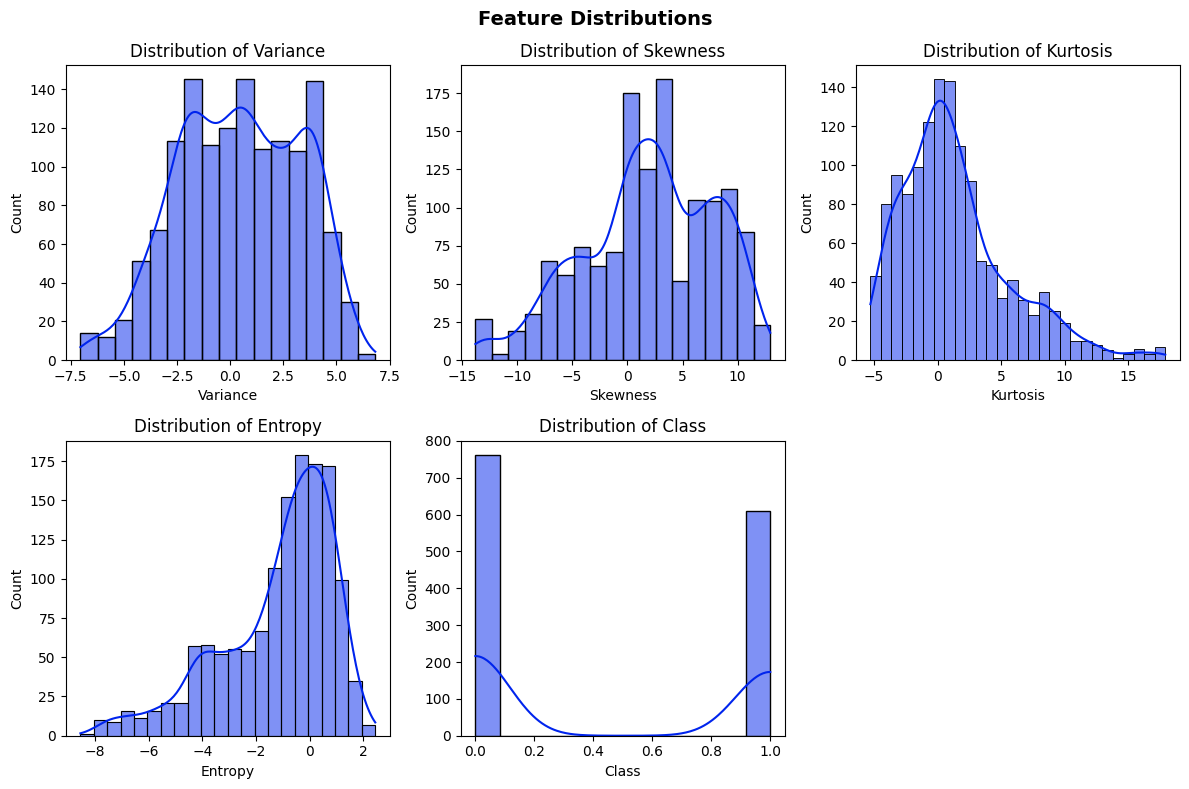

In [26]:
# Create histograms with distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)  # Adjust layout for 5 features
    sns.histplot(df[col], kde=True, color=sns.color_palette("winter")[0])
    # Plot titles
    plt.title(f"Distribution of {col}")
# Figure title
plt.suptitle("Feature Distributions", fontsize=14, fontweight='bold')
# Show the plot
plt.tight_layout()
plt.show()


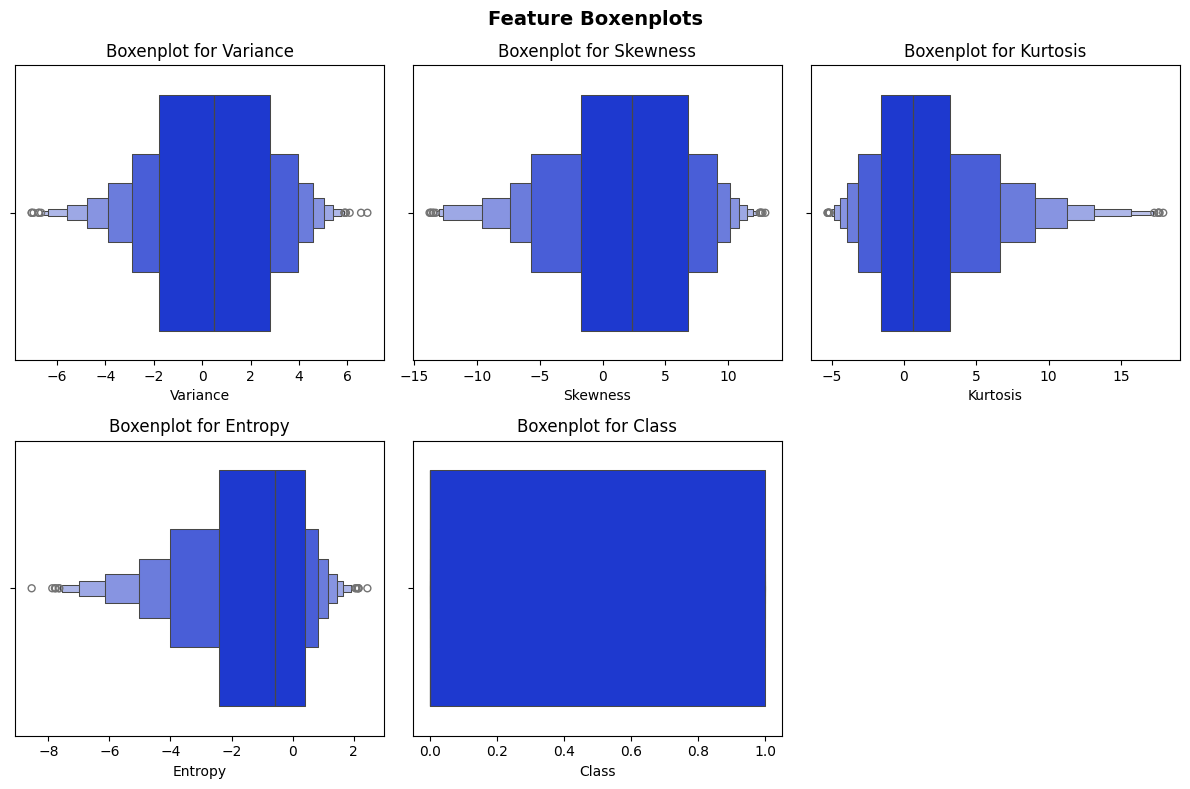

In [27]:
# Create the figure
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  
axes = axes.flatten()  # Flatten for easy iteration

# Create a boxenplot for each column
for i, column in enumerate(df.columns):
    sns.boxenplot(x=df[column], ax=axes[i], color=sns.color_palette("winter")[0])
    # Plot titles
    axes[i].set_title(f"Boxenplot for {column}")
# Hide any remaining empty subplots
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')
    
# Figure title
plt.suptitle("Feature Boxenplots", fontsize=14, fontweight='bold')
# Show the plot
plt.tight_layout()
plt.show()

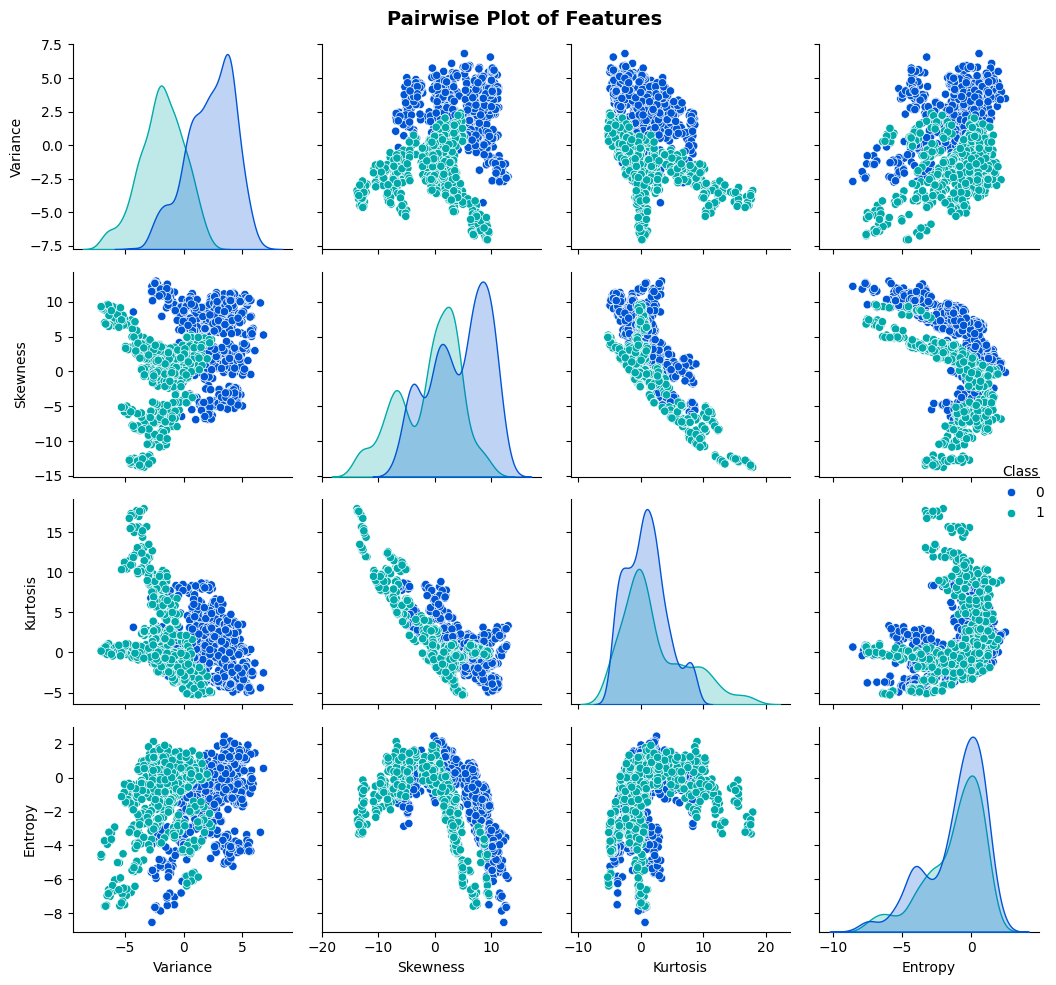

In [28]:
# Create a pairwise plot for all columns (no categorical columns)
sns.pairplot(df, hue="Class", palette="winter")  # Hue adds color coding for the 'Class' column
# Figure title
plt.suptitle("Pairwise Plot of Features", fontsize=14, fontweight='bold')
# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Check class distribution
class_distribution = df['Class'].value_counts(normalize=True)

# Print the class distribution
print(class_distribution)

# Determine if the dataset is balanced, slightly imbalanced, or imbalanced
difference = abs(class_distribution[0] - class_distribution[1])

if difference < 0.1:
    print("\nThe dataset is balanced.")
elif 0.1 <= difference < 0.2:
    print("\nThe dataset is slightly imbalanced.")
else:
    print("\nThe dataset is imbalanced.")

Class
0    0.555394
1    0.444606
Name: proportion, dtype: float64

The dataset is slightly imbalanced.


In machine learning, a commonly used threshold for considering a dataset balance is when the class distribution difference is within 10%. The imbalance is just slightly over the threshold at 11.08%. At this time I am not going to do any sampling or class weighting, but if it seems to be an issue later, I will.

### 2.2 Handle missing values and clean data
- Impute or drop missing values (as applicable).
- Remove or transform outliers (as applicable).
- Convert categorical data to numerical format using encoding (as applicable).

**There are no missing values and all columns are numerical formatting based on section 1.2.**

In [30]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Print results
if not duplicate_rows.empty:
    print(f"Found {len(duplicate_rows)} duplicate rows!")
else:
    print("No duplicate rows found.")

Found 24 duplicate rows!


In [31]:
# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)
print(f"Duplicates removed. New dataset size: {df.shape}")

Duplicates removed. New dataset size: (1348, 5)


In [32]:
# Remove or Transform Outliers
# Using IQR to detect outliers for all numeric columns
Q1 = df.quantile(0.25)  # 25th percentile (Q1)
Q3 = df.quantile(0.75)  # 75th percentile (Q3)
IQR = Q3 - Q1  # Interquartile Range

# Define outlier condition for each column
outlier_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each column
outlier_count = outlier_condition.sum()

# Print results
print("\nOutlier count for each column:")
print(outlier_count)


Outlier count for each column:
Variance     0
Skewness     0
Kurtosis    59
Entropy     32
Class        0
dtype: int64


Options for outliers:   
Remove outliers: Suitable if the outliers are likely errors or irrelevant data points and their removal doesn’t impact the analysis.

Cap outliers: Useful if you want to keep all data points but ensure that extreme values don’t overly influence the analysis.

Impute outliers: If you believe the outliers are extreme but valid, imputing them with a more reasonable value like the median can preserve the dataset size while mitigating their impact.

**Leave as is: If the outliers represent significant or rare events, it might be better to leave them as is or consider them as a separate category.**

I believe that Kurtosis and Entropy are important features for the model and I don't want to lose valuable information by removing or capping outliers. Since the number of outliers is modest, imputation might distort the true distribution of these valid data points. I will leave as is and use scaling later on.

### 2.3 Feature selection and engineering
- Create new features (as applicable).
- Transform or combine existing features to improve model performance (as applicable).
- Scale or normalize data (as applicable).

**Since Kurtosis and Entropy have outliers and might need to be changed later, I want a feature available that captures their original interaction. This might prove to be helpful later on to increase prediction accuracy.**

In [33]:
# Create New Feature (from the original, unscaled data)
df['Kurtosis_Entropy'] = df['Kurtosis'] * df['Entropy']

# Confirm new feature
print(df.head())

   Variance  Skewness  Kurtosis  Entropy  Class  Kurtosis_Entropy
0   3.62160    8.6661   -2.8073 -0.44699      0          1.254835
1   4.54590    8.1674   -2.4586 -1.46210      0          3.594719
2   3.86600   -2.6383    1.9242  0.10645      0          0.204831
3   3.45660    9.5228   -4.0112 -3.59440      0         14.417857
4   0.32924   -4.4552    4.5718 -0.98880      0         -4.520596


In [34]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize RobustScaler - This approach scales your features while leaving the outliers intact.
scaler = RobustScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the scaled features with the target variable
df_scaled = X_scaled_df.copy()
df_scaled['Class'] = y.values

# Display the first few rows of the scaled dataset
print(df_scaled.head())

   Variance  Skewness  Kurtosis   Entropy  Kurtosis_Entropy  Class
0  0.668735  0.751743 -0.719180  0.047158          0.143336      0
1  0.867942  0.692536 -0.645698 -0.315775          0.754666      0
2  0.721409 -0.590340  0.277891  0.245030         -0.130994      0
3  0.633174  0.853452 -0.972878 -1.078137          3.582378      0
4 -0.040840 -0.806047  0.835821 -0.146555         -1.365585      0


### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

Patterns/Anomalies: When both Kurtosis and Entropy are negative (as in row 0 and row 3), their product becomes positive. With a very high product (14.42) compared to the others, it suggests that the combination of a highly negative Kurtosis and Entropy leads to an extreme value. Conversely, if one is positive and the other negative (as in row 4), the result is negative. The negative value (-4.52) indicates an inverse relationship between Kurtosis and Entropy for that record.

Stands Out: The presence of an extreme value in Kurtosis_Entropy (after robust scaling) might signal that this feature has a heavy tail or outliers. This may provide valuable information for certain models (e.g., tree-based models) but could require further attention if using models sensitive to outliers.

Clean/Improve: There were duplicate rows that had to be removed in order to avoid data leakage in the train/test sets. RobustScaler is less sensitive to the outliers that remain in the data, preserving the structure of the original values while putting all features on a similar scale. After the features are on comparable scales, which is crucial for many machine learning algorithms that assume features are similarly distributed.

Feature Creation: Kurtosis_Entropy - to capture a potential interaction effect between these variables. This can help models capture non-linear relationships that might not be evident when considering each feature in isolation.

****

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)   
    * Regression: Continuous target variable (e.g., price, temperature).   
    * Classification: Categorical target variable (e.g., gender, species).   
    * Clustering: No target variable.   
- Justify your selection with reasoning.

**All of the original four features (inputs) — Variance, Skewness, Kurtosis, and Entropy — captures a different aspect of the distribution of pixel intensity values, which is relevant for distinguishing genuine banknotes from forgeries. The classification target will be Class.**

### 3.2 Define X and y
- Assign input features to X
- Assign target variable to y (as applicable)


In [35]:
# Choose features and target
X = df_scaled[['Variance', 'Skewness', 'Kurtosis', 'Entropy']]
y = df_scaled['Class']

# Print the column headings for X and y
print("Features (X) columns:")
print(X.columns.tolist(), "\n")

print("Target (y) column:")
print(y.name)

Features (X) columns:
['Variance', 'Skewness', 'Kurtosis', 'Entropy'] 

Target (y) column:
Class


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?
Using all available features in the initial model ensures that no useful information is discarded prematurely. Each of these features provides complementary information about the structure of the banknote image. Feature selection and dimensionality reduction techniques can be applied later based on feature importance analysis, correlation checks, and model evaluation. 

****

## Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)
### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [36]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Show set sizes
print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 1078
Test size: 270


In [37]:
# Verify feature sets split properly
# Check if any test samples exist in the training set
overlap = X_test.merge(X_train, how="inner", indicator=False)

if not overlap.empty:
    print(f"Data leakage detected! {len(overlap)} rows overlap between train and test sets.", "\n")
else:
    print("No overlapping data between training and test sets.", "\n")

# Verify target sets split properly
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set class distribution:\n", y_test.value_counts(normalize=True))

No overlapping data between training and test sets. 

Training set class distribution:
 Class
0    0.551948
1    0.448052
Name: proportion, dtype: float64

Test set class distribution:
 Class
0    0.52963
1    0.47037
Name: proportion, dtype: float64


### 4.2 Train model using Scikit-Learn model.fit() method.

In [38]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=44, max_depth=5, min_samples_split=10)
# Train the model
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy on both training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Show trees for confirmation
print(f"Total Trees: {len(rf_model.estimators_)}", "\n")

# Print the accuracy of each set
print(f"Training Accuracy: {train_accuracy:.4f}", "\n")
print(f"Test Accuracy: {test_accuracy:.4f}", "\n")

# Check for overfitting/underfitting
if train_accuracy > test_accuracy:
    print("The model may be overfitting (performing better on training data).")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting (performing worse on test data).")
else:
    print("The model is performing equally on both training and test data.")

Total Trees: 100 

Training Accuracy: 0.9954 

Test Accuracy: 0.9963 

The model may be underfitting (performing worse on test data).


### 4.3 Evalulate performance, for example:
- Regression: R^2, MAE, RMSE (RMSE has been recently updated)
- Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
- Clustering: Inertia, Silhouette Score

RF Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       143
           1       0.99      1.00      1.00       127

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



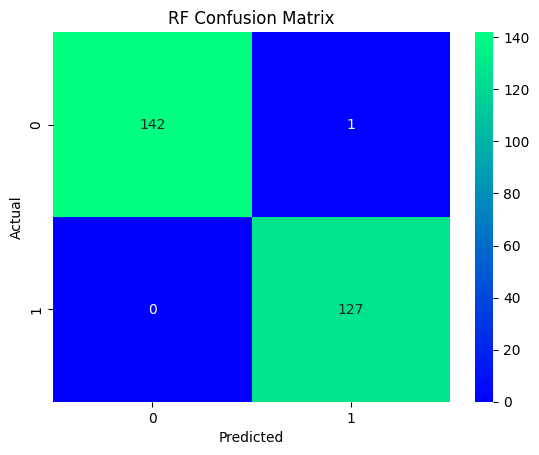

In [39]:
# Classification report to show Accuracy, Precision, and F1-score
print("RF Classification Report:\n", classification_report(y_test, y_pred))

# Create confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Create heatmap
sns.heatmap(cm, annot=True, cmap="winter", fmt="d")
# Axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RF Confusion Matrix")
# Show the plot
plt.tight_layout
plt.show()

In [40]:
# Confirming the robustness of the model to avoid overfitting to a single test set
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

Cross-validation scores: [0.98888889 0.98888889 0.98148148 0.99256506 0.98513011]
Mean CV score: 0.9873908853091009


### Reflection 4: How well did the model perform? Any surprises in the results?
I am completely surprised. I was so surprised that I had to look up multiple ways to verify the results.   
The training and test accuracies are very close to each other, which is a sign of a well-generalized model. There isn't a significant drop in performance from training to testing, so the model isn't overfitting. The model performs consistently across different cross-validation folds, which reinforces the reliability of its predictions.

****

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)
### 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

In [41]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=44)
# Train the model
dt_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred_dt = rf_model.predict(X_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy on both training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred_dt)
test_accuracy = accuracy_score(y_test, y_pred_dt)

# Show depth for confirmation
print(f"Tree Depth: {dt_model.get_depth()}", "\n")

# Print the accuracy of each set
print(f"Training Accuracy: {train_accuracy:.4f}", "\n")
print(f"Test Accuracy: {test_accuracy:.4f}", "\n")

# Check for overfitting/underfitting
if train_accuracy > test_accuracy:
    print("The model may be overfitting (performing better on training data).")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting (performing worse on test data).")
else:
    print("The model is performing equally on both training and test data.")

Tree Depth: 8 

Training Accuracy: 0.9954 

Test Accuracy: 0.9852 

The model may be overfitting (performing better on training data).


DT Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       143
           1       0.98      0.99      0.98       127

    accuracy                           0.99       270
   macro avg       0.98      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



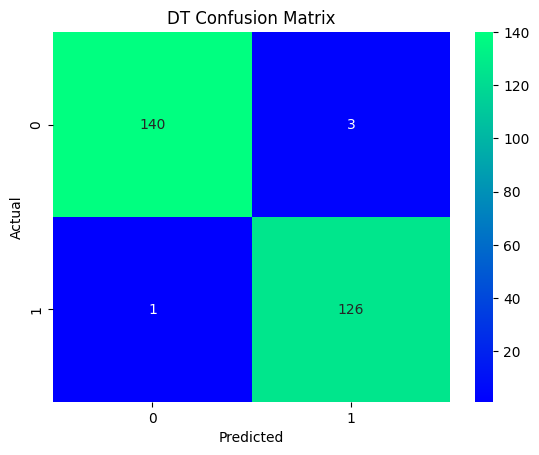

In [42]:
# Classification report to show Accuracy, Precision, and F1-score
print("DT Classification Report:\n", classification_report(y_test, y_pred_dt))

# Create confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
# Create heatmap
sns.heatmap(cm, annot=True, cmap="winter", fmt="d")
# Axis labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DT Confusion Matrix")
# Show the plot
plt.tight_layout
plt.show()

In [43]:
# Confirming the robustness of the model to avoid overfitting to a single test set
cv_scores = cross_val_score(dt_model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

Cross-validation scores: [0.98518519 0.97407407 0.98518519 0.98513011 0.99628253]
Mean CV score: 0.9851714167699297


### 5.2 Compare performance of all models across the same performance metrics.
Since I've already completed classification reports, confusion matrices, and cross validation, I used a different method for this section.

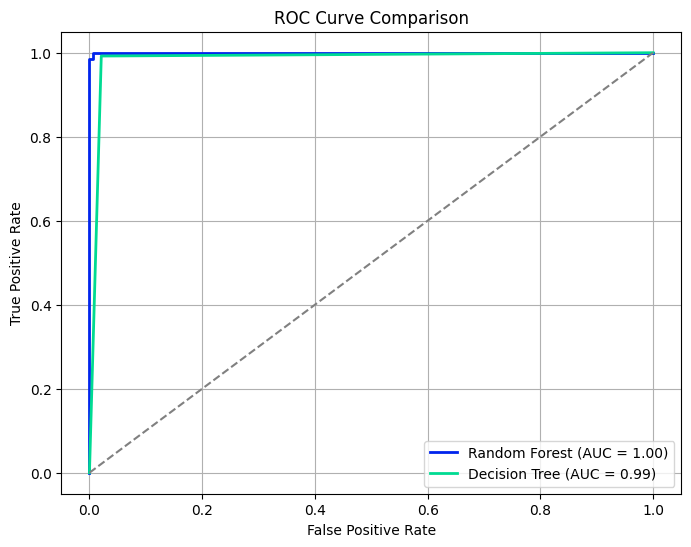

In [44]:
# Use an ROC Curve to compare models
# Get predicted probabilities for ROC curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='#0024ED', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='#00DB92', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
# Create a legend
plt.legend(loc='lower right')
# Show the plot
plt.grid()
plt.show()

### Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?
The Random Forest model had a nearly perfect performance, with training accuracy of 99.54% and test accuracy of 99.63%. Given the cross-validation scores, Random Forest likely performed better than simpler models like Decision Trees due to its ensemble nature, reducing overfitting while maintaining high predictive power.

****

## Section 6. Final Thoughts & Insights
### 6.1 Summarize findings.
Variance and Skewness had the highest correlation with Class, making them key predictors. The Random Forest classifier performed exceptionally well, achieving almost 100% accuracy on both the test set and cross-validation. The model might be too good, suggesting an overly simple problem where the features naturally separate the classes well.

### 6.2 Discuss challenges faced.
The exceptionally high accuracy caused me to double check the model. The training and test sets had overlapping data (data leakage). I had to check the dataset for duplicate rows and remove them in order for the sets to split properly. There were some extreme outliers identified. I had to decide which option for handling them would let the model perform without skewing predicitons. The two features containing outliers were Kurtosis and Entropy. I decided to create a new feature Kurtosis_Entropy to capture their interaction. The feature ended up having a low correlation with Class, making it not worth using in the model.

### 6.3 If you had more time, what would you try next?
Investigate Feature Selection – Run feature importance to see if dropping low-correlation features improves performance.   
Try Hyperparameter Tuning – Use GridSearchCV or RandomizedSearchCV to fine-tune the Random Forest model.

### Reflection 6: What did you learn from this project?
The Random Forest model excels at distinguishing between real and fake banknotes. Feature correlation analysis is key. Some features may not be as useful as they initially seem. Data leakage is a real concern. If performance is too good to be true, verify the data split. Honestly, I would say validating the split everytime would be beneficial! I had no idea the data had duplicate rows until I completed this step. Cross-validation is essential to confirm that a model generalizes well beyond the training data.